In [182]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [183]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
original=pd.read_csv('Churn_Modelling.csv')

In [184]:
train_data=pd.concat([train,original],axis=0, ignore_index=True)
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,RowNumber
0,0.0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,NaN
1,1.0,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,NaN
2,2.0,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,NaN
3,3.0,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,NaN
4,4.0,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,NaN


In [185]:
train_data.isnull().sum()

id                  10002
CustomerId              0
Surname                 0
CreditScore             0
Geography               1
Gender                  0
Age                     1
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               1
IsActiveMember          1
EstimatedSalary         0
Exited                  0
RowNumber          165034
dtype: int64

In [186]:
train_data.drop(columns=['id','RowNumber','Surname','CustomerId'],inplace=True)
train_data.dropna(inplace=True)
train_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [187]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175032 entries, 0 to 175035
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      175032 non-null  int64  
 1   Geography        175032 non-null  object 
 2   Gender           175032 non-null  object 
 3   Age              175032 non-null  float64
 4   Tenure           175032 non-null  int64  
 5   Balance          175032 non-null  float64
 6   NumOfProducts    175032 non-null  int64  
 7   HasCrCard        175032 non-null  float64
 8   IsActiveMember   175032 non-null  float64
 9   EstimatedSalary  175032 non-null  float64
 10  Exited           175032 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 16.0+ MB


<Axes: >

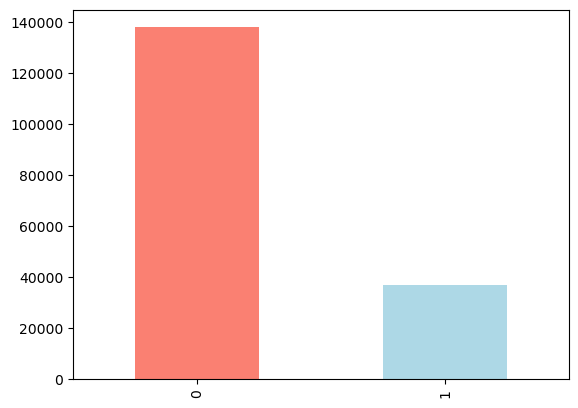

In [188]:
train_data['Exited'].value_counts().plot(kind='bar',color=['salmon','lightblue'])


In [189]:
train_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
CreditScore,668,627,678,581,716,588,593,678,676,583
Geography,France,France,France,France,Spain,Germany,France,Spain,France,Germany
Gender,Male,Male,Male,Male,Male,Male,Female,Male,Male,Male
Age,33.0,33.0,40.0,34.0,33.0,36.0,30.0,37.0,43.0,40.0
Tenure,3,1,10,2,5,4,8,1,4,4
Balance,0.0,0.0,0.0,148882.54,0.0,131778.58,144772.69,138476.41,0.0,81274.33
NumOfProducts,2,2,2,1,2,1,1,1,2,1
HasCrCard,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
IsActiveMember,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
EstimatedSalary,181449.97,49503.5,184866.69,84560.88,15068.83,136024.31,29792.11,106851.6,142917.13,170843.07


In [190]:
train_data['Gender']=train_data['Gender'].map({'Male':0,
                                               'Female':1})
train_data.head().T

,0,1,2,3,4
CreditScore,668,627,678,581,716
Geography,France,France,France,France,Spain
Gender,0,0,0,0,0
Age,33.0,33.0,40.0,34.0,33.0
Tenure,3,1,10,2,5
Balance,0.0,0.0,0.0,148882.54,0.0
NumOfProducts,2,2,2,1,2
HasCrCard,1.0,1.0,1.0,1.0,1.0
IsActiveMember,0.0,1.0,0.0,1.0,1.0
EstimatedSalary,181449.97,49503.5,184866.69,84560.88,15068.83


In [191]:
X=train_data.drop('Exited',axis=1)
y=train_data['Exited']

In [192]:
cat_column=[]
num_column=[]
for col in X.columns:
    if X[col].dtype=='O':
        cat_column.append(col)
    else:
        num_column.append(col)

cat_column

['Geography']

In [193]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_pipeline=Pipeline([('scaler',MinMaxScaler())])
cat_pipeline=Pipeline([('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

preprocessor=ColumnTransformer([('num_pipeline',num_pipeline,num_column),
                                ('cat_pipeline',cat_pipeline,cat_column)],remainder='passthrough')


In [194]:
X=preprocessor.fit_transform(X)


In [195]:
X.shape

(175032, 12)

In [196]:
y.shape

(175032,)

In [197]:
y.value_counts()


0    138073
1     36959
Name: Exited, dtype: int64

In [198]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')


In [89]:
# X,y=smote.fit_resample(X,y)

In [90]:
y.value_counts()


0    138073
1     36959
Name: Exited, dtype: int64

In [91]:
X.shape[1]


12

## Model Training

In [215]:
# model=keras.Sequential([
#     keras.layers.Dense(10,input_shape=(X.shape[1],),activation='relu'),
#     keras.layers.Dense(5,activation='sigmoid'),
#     keras.layers.Dense(1,activation='sigmoid')
# ])

model= keras.Sequential([
    keras.layers.Dense(64, input_shape=(X.shape[1],), activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1), 
    keras.layers.Dense(16, activation='tanh'),
       
    keras.layers.Dense(1, activation='sigmoid')
])



model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 64)                832       
                                                                 
 dropout_41 (Dropout)        (None, 64)                0         
                                                                 
 dense_75 (Dense)            (None, 32)                2080      
                                                                 
 dropout_42 (Dropout)        (None, 32)                0         
                                                                 
 dense_76 (Dense)            (None, 16)                528       
                                                                 
 dense_77 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 

In [216]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(curve='ROC')])


In [217]:
model.fit(X,y,epochs=1000,validation_split=0.3, callbacks=[early_stopping])

Epoch 1/1000
3829/3829 [==============================] - 16s 4ms/step - loss: 0.3575 - auc_21: 0.8567 - val_loss: 0.3381 - val_auc_21: 0.8745
Epoch 2/1000
3829/3829 [==============================] - 16s 4ms/step - loss: 0.3333 - auc_21: 0.8781 - val_loss: 0.3352 - val_auc_21: 0.8782
Epoch 3/1000
3829/3829 [==============================] - 18s 5ms/step - loss: 0.3312 - auc_21: 0.8795 - val_loss: 0.3342 - val_auc_21: 0.8780
Epoch 4/1000
3829/3829 [==============================] - 16s 4ms/step - loss: 0.3302 - auc_21: 0.8806 - val_loss: 0.3356 - val_auc_21: 0.8771
Epoch 5/1000
3829/3829 [==============================] - 15s 4ms/step - loss: 0.3285 - auc_21: 0.8818 - val_loss: 0.3338 - val_auc_21: 0.8789
Epoch 6/1000
3829/3829 [==============================] - 16s 4ms/step - loss: 0.3280 - auc_21: 0.8823 - val_loss: 0.3367 - val_auc_21: 0.8779
Epoch 7/1000
3829/3829 [==============================] - 16s 4ms/step - loss: 0.3276 - auc_21: 0.8828 - val_loss: 0.3316 - val_auc_21: 0.8802

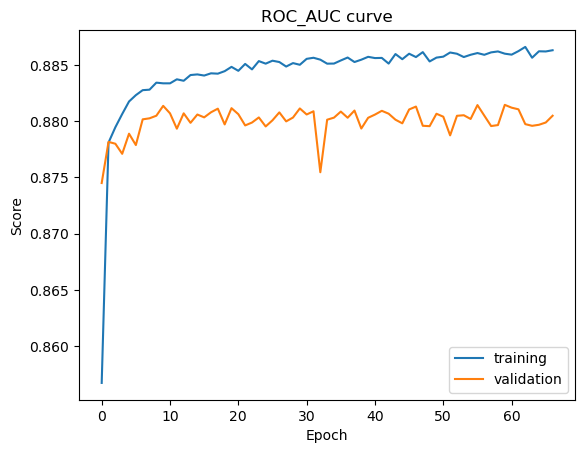

In [218]:
history=pd.DataFrame(model.history.history)

from matplotlib import pyplot as plt
plt.plot(history['auc_21'],label='training')
plt.plot(history['val_auc_21'],label='validation')
plt.title("ROC_AUC curve")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.show()



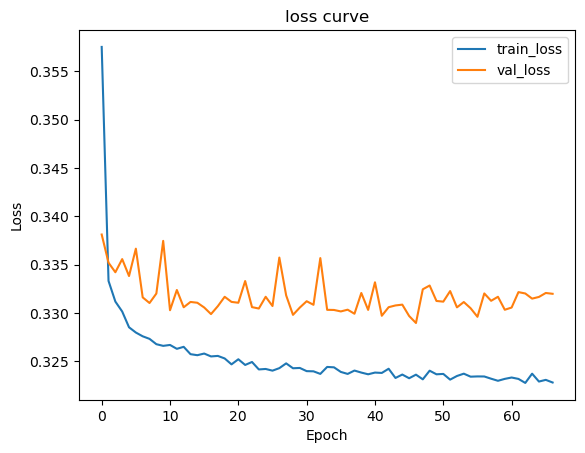

In [219]:
plt.plot(history['loss'],label='train_loss')
plt.plot(history['val_loss'],label='val_loss')
plt.title("loss curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [178]:
model.evaluate(X,y)

5470/5470 [==============================] - 14s 3ms/step - loss: 0.3317 - auc_19: 0.8841


[0.3316916227340698, 0.8840901851654053]

In [179]:
from sklearn.metrics import classification_report
y_pred=model.predict(X)

5470/5470 [==============================] - 13s 2ms/step


In [180]:
print(classification_report(y,y_pred.round()))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92    138073
           1       0.78      0.49      0.60     36959

    accuracy                           0.86    175032
   macro avg       0.83      0.73      0.76    175032
weighted avg       0.86      0.86      0.85    175032



              precision    recall  f1-score   support

           0       0.89      0.93      0.91    138073
           1       0.68      0.59      0.63     36959

    accuracy                           0.86    175032
   macro avg       0.79      0.76      0.77    175032
weighted avg       0.85      0.86      0.85    175032

In [199]:
test.drop(['id','CustomerId','Surname'],axis='columns',inplace=True)
test.Gender = test.Gender.map({'Male':0,'Female':1})
test = preprocessor.transform(test)

test


array([[0.472     , 1.        , 0.06756757, ..., 1.        , 0.        ,
        0.        ],
       [0.666     , 1.        , 0.37837838, ..., 1.        , 0.        ,
        0.        ],
       [0.612     , 1.        , 0.21621622, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.724     , 0.        , 0.17567568, ..., 1.        , 0.        ,
        0.        ],
       [0.718     , 1.        , 0.18918919, ..., 1.        , 0.        ,
        0.        ],
       [0.542     , 1.        , 0.25675676, ..., 1.        , 0.        ,
        0.        ]])

In [200]:
y_pred=model.predict(test)
y_pred

3439/3439 [==============================] - 7s 2ms/step


array([[0.01058606],
       [0.8576237 ],
       [0.02110474],
       ...,
       [0.01076486],
       [0.10692293],
       [0.17873597]], dtype=float32)

In [201]:
y_pred=pd.DataFrame(y_pred,columns=['Exited'])
y_pred

,Exited
0,0.010586
1,0.857624
2,0.021105
3,0.320925
4,0.321608
...,...
110018,0.019397
110019,0.041594
110020,0.010765
110021,0.106923


In [202]:
sample_sub=pd.read_csv('sample_submission.csv')
sample_sub.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [203]:
sub=pd.concat([sample_sub['id'],y_pred],axis=1)
sub.head()

,id,Exited
0,165034,0.010586
1,165035,0.857624
2,165036,0.021105
3,165037,0.320925
4,165038,0.321608


In [204]:
sub.to_csv('submission7.csv',index=False)

In [205]:
sub.shape

(110023, 2)

In [209]:
sub5=pd.read_csv('submission5.csv')
sub4=pd.read_csv('submission4.csv')
sub5['Exited']=sub['Exited']*0.3+sub5['Exited']*0.4+sub4['Exited']*0.3

In [210]:
sub5.to_csv('submission9.csv',index=False)

In [211]:
sub5.head()

,id,Exited
0,165034,0.024140
1,165035,0.832150
2,165036,0.026743
3,165037,0.251847
4,165038,0.348715
